# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls

In [3]:
# lat, lng, max temp, humidity, cloudiness, wind speed, country, date
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="

# Set up lists for dataframe
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_with_data = []
cities_not_found = []
record = 1
set_count = 1

print("Beginning Data Retrieval")
print("------------------------------")
# For loop will retrieve data from API and append to corresponding lists
for city in cities:
    weather_response = requests.get(query_url + city).json()
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    # If statement will check if the record count is within 50. 
    # After 50 records are processed, the script will sleep for 5 seconds.
    # This is to stay within limitations of max API calls per minute.
    if record < 50:
        # For any city that data cannot be retrieved, the try-except will skip
        # and load any cities into cities_not_found list to later check if number of
        # processed records fall within expectation.
        try:
            cities_with_data.append(weather_response['name'])
            lat.append(weather_response['coord']['lat'])
            lon.append(weather_response['coord']['lon'])
            max_temp.append(weather_response['main']['temp_max'])
            humidity.append(weather_response['main']['humidity'])
            cloudiness.append(weather_response['clouds']['all'])
            wind_speed.append(weather_response['wind']['speed'])
            country.append(weather_response['sys']['country'])
            date.append(weather_response['dt'])
        except:
            print(f"City '{city}' not found. Skipping...")
            cities_not_found.append(city)

        record+=1
    else:
        time.sleep(5)
        record = 1
        set_count+=1

print("------------------------------")
print(f"Data Retrieval Complete.\nProcessed {len(cities_with_data)} number of cities.\n{len(cities_not_found)} cities not found.")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | namatanai
Processing Record 2 of Set 1 | dingle
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | marsaxlokk
Processing Record 6 of Set 1 | kapatalan
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | kralendijk
Processing Record 9 of Set 1 | labuhan
Processing Record 10 of Set 1 | bargal
City 'bargal' not found. Skipping...
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | llata
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | maralal
Processing Record 17 of Set 1 | mahon
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | the valley
Processing Record 21 of Set 1 | vaitupu
City 'vaitupu' not found. Skipping...
Processing R

Processing Record 38 of Set 4 | jerantut
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | beidao
Processing Record 42 of Set 4 | puerto escondido
Processing Record 43 of Set 4 | inderborskiy
City 'inderborskiy' not found. Skipping...
Processing Record 44 of Set 4 | abay
Processing Record 45 of Set 4 | karaul
City 'karaul' not found. Skipping...
Processing Record 46 of Set 4 | elizabeth city
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | bilibino
Processing Record 49 of Set 4 | fare
Processing Record 50 of Set 4 | fortuna
Processing Record 1 of Set 5 | amapa
Processing Record 2 of Set 5 | dali
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | mouzakion
City 'mouzakion' not found. Skipping...
Processing Record 7 of Set 5 | yulara
Processing Record 8 of Set 5 | faanui
Processing Record 9 of Set 5 | 

Processing Record 21 of Set 8 | roma
Processing Record 22 of Set 8 | san ramon de la nueva oran
Processing Record 23 of Set 8 | necochea
Processing Record 24 of Set 8 | thenzawl
Processing Record 25 of Set 8 | leningradskiy
Processing Record 26 of Set 8 | turukhansk
Processing Record 27 of Set 8 | karratha
Processing Record 28 of Set 8 | brekstad
Processing Record 29 of Set 8 | porbandar
Processing Record 30 of Set 8 | nantucket
Processing Record 31 of Set 8 | hailar
Processing Record 32 of Set 8 | zapolyarnyy
Processing Record 33 of Set 8 | sorong
Processing Record 34 of Set 8 | tucurui
Processing Record 35 of Set 8 | assiniboia
Processing Record 36 of Set 8 | mount pleasant
Processing Record 37 of Set 8 | toliary
City 'toliary' not found. Skipping...
Processing Record 38 of Set 8 | fort nelson
Processing Record 39 of Set 8 | pozoblanco
Processing Record 40 of Set 8 | lahat
Processing Record 41 of Set 8 | faya
Processing Record 42 of Set 8 | castrillon
Processing Record 43 of Set 8 | 

Processing Record 4 of Set 12 | buraydah
Processing Record 5 of Set 12 | zyryanka
Processing Record 6 of Set 12 | khani
Processing Record 7 of Set 12 | itaquyry
Processing Record 8 of Set 12 | warmbad
Processing Record 9 of Set 12 | srandakan
Processing Record 10 of Set 12 | sisophon
Processing Record 11 of Set 12 | muswellbrook
Processing Record 12 of Set 12 | jurado
Processing Record 13 of Set 12 | prince rupert
Processing Record 14 of Set 12 | chany
Processing Record 15 of Set 12 | pakxe
Processing Record 16 of Set 12 | mogadishu
Processing Record 17 of Set 12 | caraballeda
Processing Record 18 of Set 12 | moorhead
Processing Record 19 of Set 12 | grants pass
Processing Record 20 of Set 12 | tarudant
City 'tarudant' not found. Skipping...
Processing Record 21 of Set 12 | boralday
Processing Record 22 of Set 12 | jatiroto
Processing Record 23 of Set 12 | omsk
Processing Record 24 of Set 12 | kuito
Processing Record 25 of Set 12 | lastoursville
Processing Record 26 of Set 12 | straume

### Convert Raw Data to DataFrame

In [21]:
# Create and display DataFrame
city_data = pd.DataFrame({
    "City": cities_with_data,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Namatanai,-3.6667,152.4333,299.46,83,21,2.59,PG,1658695967
1,Dingle,10.9995,122.6711,297.77,90,82,0.57,PH,1658695967
2,Rikitea,-23.1203,-134.9692,297.28,80,55,6.43,PF,1658695968
3,Narsaq,60.9167,-46.0500,284.92,61,81,1.61,GL,1658695968
4,Marsaxlokk,35.8419,14.5431,301.53,69,0,3.09,MT,1658695968


In [22]:
# Load DataFrame to csv file to later use in Part II
city_data.to_csv(output_data_file, encoding='utf-8')

In [23]:
# Calculate and display statistical analysis of data
city_stats = city_data.agg(['count', 'mean', 'std', 'min', 'max'])[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
city_stats_2 = city_data[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].quantile([.25, .5, .75])
city_stats = pd.concat([city_stats, city_stats_2])
city_stats.set_axis(['count', 'mean', 'std', 'min', 'max', '25%', '50%', '75%'], axis='index', inplace=True)
city_stats

C:\Users\aimee\AppData\Local\Temp\ipykernel_31320\1003790626.py:2: FutureWarning: ['City', 'Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  city_stats = city_data.agg(['count', 'mean', 'std', 'min', 'max'])[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,19.629483,17.601452,294.284764,72.609457,56.295972,3.247933,1.658696e+09
std,33.298270,89.143583,8.082616,21.805838,39.926094,2.230056,9.293199e+01
min,-54.800000,-175.200000,273.480000,12.000000,0.000000,0.000000,1.658695e+09
max,78.218600,179.316700,315.470000,100.000000,100.000000,12.840000,1.658696e+09
25%,-7.466650,-62.053950,288.630000,63.000000,11.500000,1.540000,1.658696e+09
50%,22.483300,24.666700,295.380000,78.000000,73.000000,2.660000,1.658696e+09
75%,47.973650,96.094250,299.985000,90.000000,98.500000,4.565000,1.658696e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [24]:
# Drops any rows where humidity is higher than 100
clean_city_data = city_data[city_data['Humidity'] <= 100]

# Recalculates and displays statistical analysis after any rows are dropped
clean_city_stats = clean_city_data.agg(['count', 'mean', 'std', 'min', 'max'])[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
clean_city_stats_2 = clean_city_data[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].quantile([.25, .5, .75])
clean_city_stats = pd.concat([clean_city_stats, clean_city_stats_2])
clean_city_stats.set_axis(['count', 'mean', 'std', 'min', 'max', '25%', '50%', '75%'], axis='index', inplace=True)
clean_city_stats

C:\Users\aimee\AppData\Local\Temp\ipykernel_31320\525187006.py:5: FutureWarning: ['City', 'Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  clean_city_stats = clean_city_data.agg(['count', 'mean', 'std', 'min', 'max'])[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,19.629483,17.601452,294.284764,72.609457,56.295972,3.247933,1.658696e+09
std,33.298270,89.143583,8.082616,21.805838,39.926094,2.230056,9.293199e+01
min,-54.800000,-175.200000,273.480000,12.000000,0.000000,0.000000,1.658695e+09
max,78.218600,179.316700,315.470000,100.000000,100.000000,12.840000,1.658696e+09
25%,-7.466650,-62.053950,288.630000,63.000000,11.500000,1.540000,1.658696e+09
50%,22.483300,24.666700,295.380000,78.000000,73.000000,2.660000,1.658696e+09
75%,47.973650,96.094250,299.985000,90.000000,98.500000,4.565000,1.658696e+09


## Plotting the Data

## Latitude vs. Temperature Plot

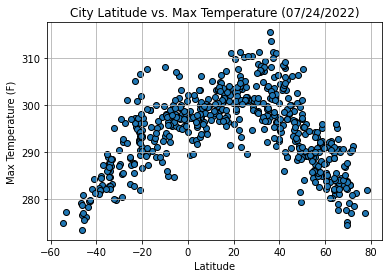

In [25]:
# City Latitude vs Max Temperature (07/24/2022)
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Max Temperature (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsMaxTemp.png")

plt.show()

The plot above displays the distribution of max temperatures across the latitude values of the cities. The closer the points are to the center (0), the higher the max temperature. Conversely, the farther the points are from the center, the lower the max temperature.

## Latitude vs. Humidity Plot

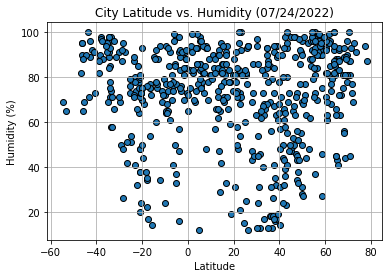

In [26]:
# City Latitude vs Humidity (07/24/2022)
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Humidity (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsHumidity.png")

plt.show()

The plot above shows the relationship between humidity and latitude of the cities. This cities where there is a lower percentage of humidity tend to be closer to the equator.

## Latitude vs. Cloudiness Plot

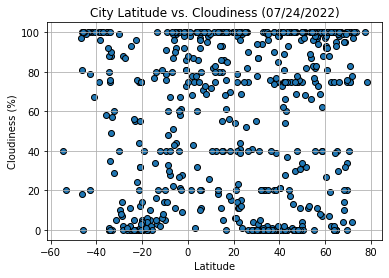

In [27]:
# City Latitude vs Cloudiness (07/24/2022)
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Cloudiness (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsCloudiness.png")

plt.show()

The plot above shows the relationship between cloudiness percentage and latitude of the cities. The cloudiness percentage tends to fall above 80% and below 20%. Besides that, there seems to be no concrete relationship.

## Latitude vs. Wind Speed Plot

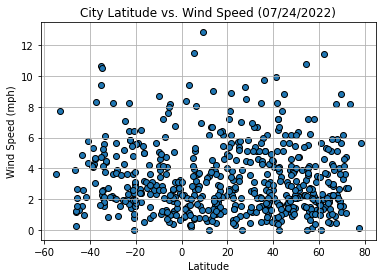

In [28]:
# City Latitude vs Wind Speed (07/24/2022)
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", edgecolors='black')
plt.title("City Latitude vs. Wind Speed (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Images/CityLatitudeVsWindSpeed.png")

plt.show()

The plot above shows the relationship between wind speed and latitude of the cities. The majority of the cities in this set have a wind speed less than 6 mph. 

## Linear Regression

In [29]:
# Splits the city weather data between north and south hemisphere for further linear regression computations.
south_hemi = clean_city_data[clean_city_data['Lat'] < 0]
north_hemi = clean_city_data[clean_city_data['Lat'] > 0]
print(f"# Northern Hemisphere Cities: {len(north_hemi)}.\n# Southern Hemisphere Cities: {len(south_hemi)}.")

# Northern Hemisphere Cities: 391.
# Southern Hemisphere Cities: 180.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

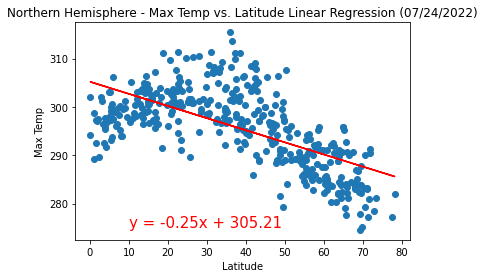

The r-value is: -0.6397485603839435


In [30]:
xValues = north_hemi['Lat']
yValues = north_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (10,275), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("Images/NorthHemiCityLatitudeVsMaxTempRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows a strong negative relationship between city latitude and max temperature in the northern hemisphere. As latitude is increasing away from 0, the max temperature is lower.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

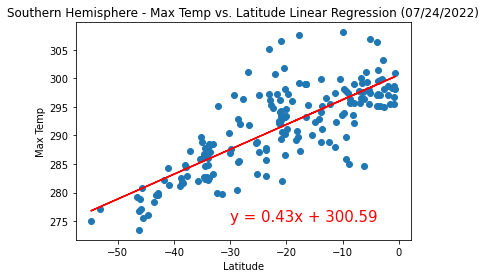

The r-value is: 0.7826437243966269


In [31]:
xValues = south_hemi['Lat']
yValues = south_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-30,275), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("Images/SouthHemiCityLatitudeVsMaxTempRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows a strong positve relationship between city latitude and max temperature in the southern hemisphere. As latitude is increasing towards 0, the max temperature is higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

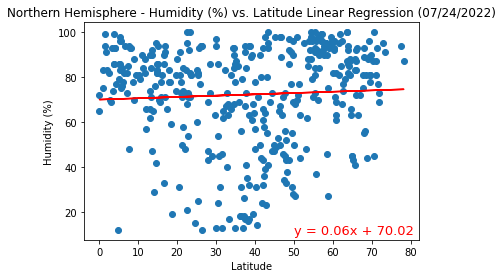

The r-value is: 0.053106589414113815


In [32]:
xValues = north_hemi['Lat']
yValues = north_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (50,10), fontsize=13, color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/NorthHemiCityLatitudeVsHumidityRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows a weak positive relationship between city latitude and humidity in the northern hemisphere. As latitude is increasing away from 0, the humidity percentage is slightly higher.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

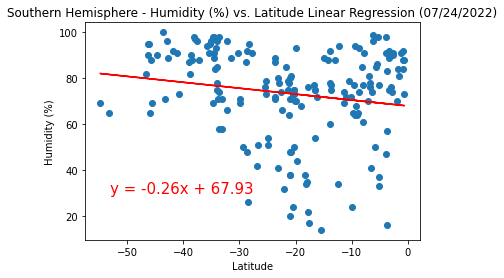

The r-value is: -0.17212160406907528


In [33]:
xValues = south_hemi['Lat']
yValues = south_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-53,30), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/SouthHemiCityLatitudeVsHumidityRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows a weak negative relationship between city latitude and humidity in the southern hemisphere. As latitude is increasing towards 0, the humidity percentage is slightly lower.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

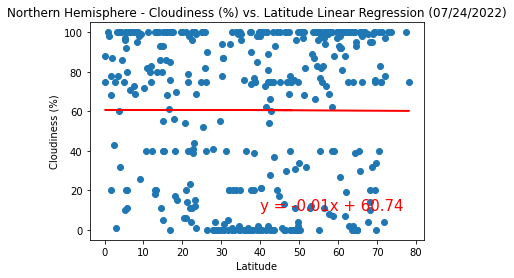

The r-value is: -0.0029061405371044345


In [34]:
xValues = north_hemi['Lat']
yValues = north_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/NorthHemiCityLatitudeVsCloudinessRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows a slightly negative relationship to no relationship between cloudiness percentage and city latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

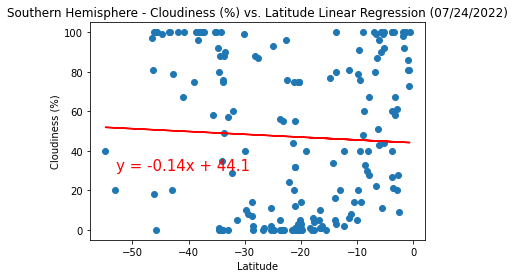

The r-value is: -0.04818843404210446


In [35]:
xValues = south_hemi['Lat']
yValues = south_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-53,30), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/SouthHemiCityLatitudeVsCloudinessRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows a slightly negative relationship between cloudiness percentage and city latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

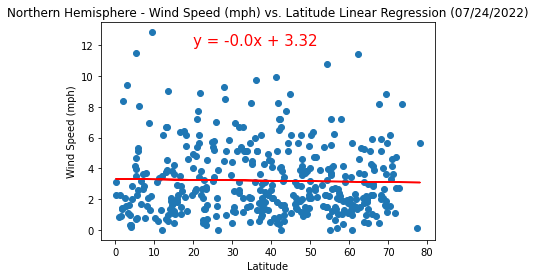

The r-value is: -0.02706389435004348


In [36]:
xValues = north_hemi['Lat']
yValues = north_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (20,12), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/NorthHemiCityLatitudeVsWindSpeedRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows a slightly negative relationship to no relationship between wind speed and city latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

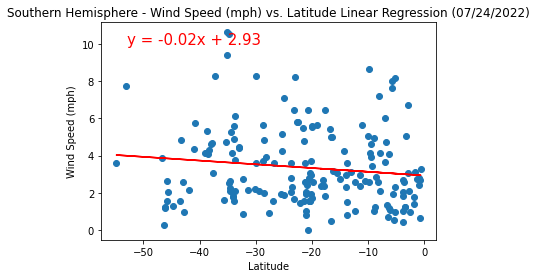

The r-value is: -0.1273403503262327


In [37]:
xValues = south_hemi['Lat']
yValues = south_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq, (-53,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (07/24/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/SouthHemiCityLatitudeVsWindSpeedRegress.png")

plt.show()

print(f"The r-value is: {rvalue}")

The plot above shows a slightly negative relationship between wind speed and city latitude in the southern hemisphere.